## MNIST Image classification

In [1]:
from fastai.vision.all import *
from fastai import *

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
(path/'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/0')]

In [4]:
zeroes = (path/'training'/'2').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixs = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

In [5]:
img = ones[1]
img1 = Image.open(img)
img1

In [6]:
img_1_tensor = tensor(img1)
df = pd.DataFrame(img_1_tensor[4:24, 9:20])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,13,212,253,56
1,0,0,0,0,0,0,0,24,252,252,139
2,0,0,0,0,0,0,0,108,252,252,45
3,0,0,0,0,0,0,0,233,252,195,9
4,0,0,0,0,0,0,53,253,252,79,0
5,0,0,0,0,0,0,116,255,253,69,0
6,0,0,0,0,0,0,116,253,223,25,0
7,0,0,0,0,0,0,199,253,174,0,0
8,0,0,0,0,0,34,238,253,92,0,0
9,0,0,0,0,0,144,252,232,8,0,0


Note: In tensor representation of the image. The first slices represents image in Y - axis, and second slice represents array in X-axis

## Using Pixel Similarity

In [7]:
zero_tensors = [tensor(Image.open(o)) for o in zeroes]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixs]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]

In [8]:
stacked_zeroes = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixs = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

In [9]:
torch.stack(one_tensors).ndim

3

<AxesSubplot:>

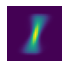

In [10]:
mean1 = stacked_ones.mean(dim=0)
show_image(mean1)

<AxesSubplot:>

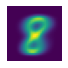

In [11]:
mean8 = stacked_eights.mean(dim=0)
show_image(mean8)

In [12]:
mean0 = stacked_zeroes.mean(0)
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_fives.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)

In [13]:
def mnist_distance(a, b):
    return (a-b).abs().mean((-1, -2))

In [14]:
means = [mean0, mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9]

# def get_prediction(x):
#   distances = [mnist_distance(x, mean_image) for mean_image in mean_images]
#   min_distance = min(distances)
#   return distances.index(min_distance)

In [15]:
def get_prediction(x):
    distances = [mnist_distance(x, mean_digit) for mean_digit in means]
    print(distances)
    return distances.index(min(distances))

In [16]:
valid = (path/'testing'/'1').ls().sorted()

In [17]:
valid[3]
valid_img = Image.open(valid[0])
valid_img

In [18]:
valid_img_tensor = tensor(valid_img)

In [19]:
get_prediction(valid_img_tensor)

[tensor(17.3236), tensor(17.2496), tensor(17.3236), tensor(17.3048), tensor(17.3053), tensor(17.3015), tensor(17.3015), tensor(17.2962), tensor(17.3025), tensor(17.2960)]


1

In [20]:
## Calculate average predictsion